# Import from Libraries

In [1]:
import pandas as pd
import numpy as np
import re
from pandas_profiling import ProfileReport

In [50]:
import matplotlib.pyplot as plt

# Data Set Shark Attack

## Import Data Set

In [2]:
shark = pd.read_csv('/Users/adrianoyoshizawa/Documents/GitHub/Exer-Ironhack/project_2/attacks.csv', encoding='latin1',sep=",")

In [3]:
shark.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

## Drop of duplicate lines


In [107]:
shark = shark.drop_duplicates()

## Columns selection

In [108]:
shark_continent = shark.loc[:,['Country','Area','Location']]

### Analyzing the number of rows and columns

In [109]:
shark_continent.shape

(6312, 3)

## Analysis of Null Value Numbers

In [110]:
shark_continent.info

<bound method DataFrame.info of          Country             Area                        Location
0            USA       California     Oceanside, San Diego County
1            USA          Georgia  St. Simon Island, Glynn County
2            USA           Hawaii                    Habush, Oahu
3      AUSTRALIA  New South Wales              Arrawarra Headland
4         MEXICO           Colima                        La Ticla
...          ...              ...                             ...
6307         NaN              NaN                             NaN
6308         NaN              NaN                             NaN
6309         NaN              NaN                             NaN
8702         NaN              NaN                             NaN
25722        NaN              NaN                             NaN

[6312 rows x 3 columns]>

In [147]:
shark_continent.isnull().sum()

Country      60
Area        465
Location    550
dtype: int64

## Removal of null values

In [118]:
shark_filt = shark_continent.dropna(axis=0,how='all')

In [119]:
shark_filt

,Country,Area,Location
0,USA,California,"Oceanside, San Diego County"
1,USA,Georgia,"St. Simon Island, Glynn County"
2,USA,Hawaii,"Habush, Oahu"
3,AUSTRALIA,New South Wales,Arrawarra Headland
4,MEXICO,Colima,La Ticla
...,...,...,...
6297,AUSTRALIA,Western Australia,Roebuck Bay
6298,AUSTRALIA,Western Australia,NaN
6299,USA,North Carolina,Ocracoke Inlet
6300,PANAMA,NaN,"Panama Bay 8ºN, 79ºW"


In [120]:
shark_filt.Country.isna().value_counts()

False    6252
True       21
Name: Country, dtype: int64

### Substitution of Null Values in the Country column for valid values

In [148]:
shark_filt.loc[shark_filt.Country.isna(),'Country']=['UNITED KINGDOM','PUERTO RICO','USA','AUSTRALIA','INDIA','MADAGASCAR',
                                            'CUBA','CHINA','BRAZIL','VIRGIN ISLANDS (U.S.)',
                                            'FRENCH SOUTHERN TERRITORIES','EQUATOR','MEDITERRAN SEA',
                                            'USA','WESTBANK','BRAZIL','SAINT HELENA',
                                            'US VIRGIN ISLANDS','ITALY','ITALY','INDIA']

/Users/adrianoyoshizawa/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-148-86a529fea6ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_filt.loc[shark_filt.Country.isna(),'Country']=['UNITED KINGDOM','PUERTO RICO','USA','AUSTRALIA','INDIA','MADAGASCAR',


In [149]:
shark_filt

,Country,Area,Location
0,USA,California,"Oceanside, San Diego County"
1,USA,Georgia,"St. Simon Island, Glynn County"
2,USA,Hawaii,"Habush, Oahu"
3,AUSTRALIA,New South Wales,Arrawarra Headland
4,MEXICO,Colima,La Ticla
...,...,...,...
6297,AUSTRALIA,Western Australia,Roebuck Bay
6298,AUSTRALIA,Western Australia,NaN
6299,USA,North Carolina,Ocracoke Inlet
6300,PANAMA,NaN,"Panama Bay 8ºN, 79ºW"


### Standardizing the formatting of My text in the Country column

In [165]:
country = shark_filt['Country'].to_list()
def up(x):
    ''' This function will transform the
         my text capital letters'''
    return x.upper().strip()

shark_filt['Country'] = list(map(up, country))

<ipython-input-165-3753d3f031bd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_filt['Country'] = list(map(up, country))


# Data Set Continents

In [19]:
continent = pd.read_csv('/Users/adrianoyoshizawa/Documents/GitHub/Exer-Ironhack/project_2/continents2.csv')

## Removing duplicate lines

In [20]:
continent.drop_duplicates()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


## Creating a data set with columns of country names and their continent only

In [21]:
continent = continent.loc[:,['name','region']]

In [22]:
continent


,name,region
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania
...,...,...
244,Wallis and Futuna,Oceania
245,Western Sahara,Africa
246,Yemen,Asia
247,Zambia,Africa


### Standardizing the formatting of My text in the name column

In [23]:
name = continent['name'].to_list()
continent['name'] = list(map(up, name))

In [26]:
continent

,name,region
0,AFGHANISTAN,Asia
1,ÅLAND ISLANDS,Europe
2,ALBANIA,Europe
3,ALGERIA,Africa
4,AMERICAN SAMOA,Oceania
...,...,...
244,WALLIS AND FUTUNA,Oceania
245,WESTERN SAHARA,Africa
246,YEMEN,Asia
247,ZAMBIA,Africa


### Changing the text name UNITED STATES to USA

In [34]:
continent['name']= continent.name.apply(lambda x:re.sub('UNITED STATES','USA',x))

# Joining the two Data Sets through the Merge

In [88]:
shark_fin = pd.merge(shark_filt,continent,left_on='Country',right_on='name',how='left')


## Deleting the name column that is repeated with Country

In [89]:
shark_fin.drop(columns = ['name'], inplace =True)

In [85]:
shark_fin['region']

0       Americas
1       Americas
2       Americas
3        Oceania
4       Americas
          ...   
6268     Oceania
6269     Oceania
6270    Americas
6271    Americas
6272         NaN
Name: region, Length: 6273, dtype: object

## Replacing the null values in the region table for Others

In [91]:
shark_fin['region'] = shark_fin['region'].fillna('Others')

# Analysis of Data Obtained

In [92]:
shark_fin

,Country,Area,Location,region
0,USA,California,"Oceanside, San Diego County",Americas
1,USA,Georgia,"St. Simon Island, Glynn County",Americas
2,USA,Hawaii,"Habush, Oahu",Americas
3,AUSTRALIA,New South Wales,Arrawarra Headland,Oceania
4,MEXICO,Colima,La Ticla,Americas
...,...,...,...,...
6268,AUSTRALIA,Western Australia,Roebuck Bay,Oceania
6269,AUSTRALIA,Western Australia,NaN,Oceania
6270,USA,North Carolina,Ocracoke Inlet,Americas
6271,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",Americas


## Adding the values obtained in the region column of each continent

In [154]:
shark_fin['region'].value_counts()

Americas    2782
Oceania     1848
Africa       768
Asia         343
Others       308
Europe       224
Name: region, dtype: int64

## Plotting the Bar Graph for viewing

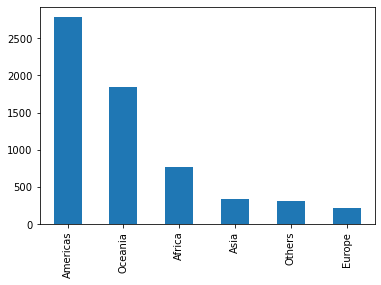

In [168]:
shark_fin['region'].value_counts().plot.bar()